# Traitement d'image basique avec scikit-image

Chargement des données pour les tests

In [ ]:
from skimage.exposure import rescale_intensity
import numpy as np
from skimage.data import chelsea
from matplotlib.pyplot import subplot, imshow, axis
from matplotlib import pyplot as plt

example_img = chelsea()

Changer linéairement la radiométrie : (minimum, maximum) -> (nouveau_minimum, nouveau_maximum)

(-0.5, 450.5, 299.5, -0.5)

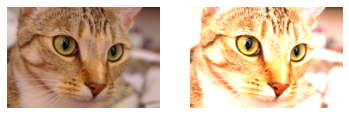

In [ ]:
subplot(1,2,1)
# "image" -> calcule le min et le max de l'image
imshow(rescale_intensity(example_img, in_range="image", out_range=np.uint8))
axis("off")
subplot(1,2,2)
imshow(rescale_intensity(example_img, in_range=(0,128), out_range=np.uint8))
axis("off")

Entrée/sortie : écriture et lecture des fichiers

(-0.5, 450.5, 299.5, -0.5)

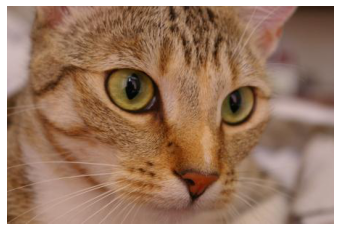

In [ ]:
from skimage.io import imread, imsave

tmp_img_path = "/tmp/chelsea.jpg"

imsave(tmp_img_path, example_img)

reloaded_img = imread(tmp_img_path)

imshow(reloaded_img)
axis("off")

# Descripteurs

Il est courant de vouloir calculer des descripteurs sur les images pour faire de l'apprentissage. Les fonctions permettent de le faire avec des techniques classiques.

In [ ]:
from skimage.transform import resize
from skimage.color import rgb2gray

DAISY

In [ ]:
from skimage.feature import daisy
im = resize(rgb2gray(chelsea()), (256,256))

descs, descs_img = daisy(im, step=64, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

HOG

(-0.5, 63.5, 63.5, -0.5)

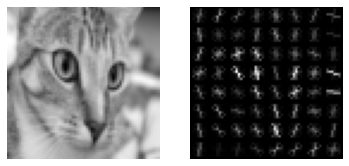

In [ ]:
from skimage.feature import hog

im = chelsea()

im = resize(rgb2gray(im), (64,64))

fd, hog_image = hog(im, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

subplot(1,2,1)
imshow(im, cmap=plt.cm.gray)
axis("off")

# Rescale histogram for better display
hog_image_rescaled = rescale_intensity(hog_image, in_range=(0, 10))
subplot(1,2,2)
imshow(hog_image_rescaled, cmap=plt.cm.gray)
axis("off")


LBP

(-0.5, 31.5, 31.5, -0.5)

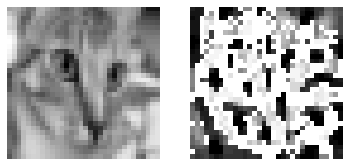

In [ ]:
from skimage.feature import local_binary_pattern

# settings for LBP
radius = 3
n_points = 8 * radius

image = resize(rgb2gray(chelsea()), (32, 32))
lbp = local_binary_pattern(image, n_points, radius, "uniform")

subplot(1,2,1)
imshow(image, cmap=plt.cm.gray)
axis("off")
subplot(1,2,2)
imshow(lbp, cmap=plt.cm.gray)
axis("off")

Haar features pour Viola Jones

In [ ]:

from skimage.feature import haar_like_feature_coord, haar_like_feature
from skimage.transform import integral_image

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

im = resize(rgb2gray(chelsea()), (32, 32))

img_ii = integral_image(im)

# Extract all possible features
feature_coord, feature_type = haar_like_feature_coord(width=im.shape[0], height=im.shape[1],
                            feature_type=feature_types)

print(f"Number of haar feature : {feature_coord.shape[0]}")

# Limiting feature for convenience reasons
# This example should run fast :smile:
feature_coord = feature_coord[:256]
feature_type = feature_type[:256]

feats = haar_like_feature(img_ii, 0, 0, img_ii.shape[0], img_ii.shape[1], feature_type=feature_type, feature_coord=feature_coord)

print(f"Extracted features: {feats.shape}")


Number of haar feature : 509270
Extracted features: (256,)


Pour aller plus loin, voir Haralick